<a href="https://colab.research.google.com/github/Khamsaen2489/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [37]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [38]:
Name = 'คำแสน แก้วพิภพ'
ID = '6230207618'

In [39]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [40]:
Data = DataGenerator(Name,ID)

020:30:14


In [41]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.779841,9.590162,7.580040,-4.278572,-6.772580,-3.337118,9.763874,2.163429,8.836751,-9.402668,6.069058,-9.942346,-9.473521,-8.133425,-3.969872,-0.409420,7.109384,7.607849,1.669154,7.170246,-8.165292,4.877405,-7.617871,-6.756496,8.850628,-5.386895,7.550170,1.864166,4.126644,2.942146,19.180325,16.710729
1,-1.969309,-5.779929,-0.479035,7.120809,-6.967939,-2.562261,-1.431636,-2.876955,-8.809777,-7.156166,9.225777,-5.276836,-10.170002,-0.050986,2.987005,-1.758751,9.133687,-4.224050,6.810339,0.860089,4.585015,2.999504,-7.098761,-8.103267,8.184693,9.626054,3.503491,-0.090879,-0.446152,7.465699,-11.559858,39.328496
2,3.599102,3.524340,-6.054480,-9.089953,5.181669,-0.834194,-3.931799,-0.137943,-4.589369,-2.365034,3.685007,0.919187,-3.120397,-2.182186,-4.271154,2.253673,-6.701235,3.455984,7.511894,-4.712591,5.952467,-0.483959,3.421101,5.602329,7.429803,0.191208,2.966675,2.952572,-2.706058,2.749403,7.048680,15.747013
3,2.610732,2.268904,-4.365511,-8.991586,6.929414,0.396067,-3.116764,0.122945,-4.237205,-4.860459,1.596553,1.567507,-2.599508,-1.812618,-5.665761,4.284519,-6.163315,2.150961,6.780581,-7.338840,4.205672,-1.683074,4.436318,7.012761,4.945608,2.722019,1.213484,2.704299,-0.405857,0.589666,4.537807,4.948332
4,1.229763,6.218683,6.069170,7.837148,-7.564717,9.068409,8.398188,-6.073507,5.877496,-2.328447,-1.386795,2.800630,8.479073,6.045114,9.387522,3.651719,-8.845904,8.773557,-4.049647,4.501112,7.998507,-0.474366,6.817369,8.979003,11.270047,-5.587750,-4.801151,-4.927810,-0.572961,7.252844,12.437365,38.264218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.115431,7.000837,-9.653089,-7.160725,9.323379,0.008322,8.853850,2.496611,3.815244,0.382697,6.690362,-3.427856,-4.262191,-1.233465,-2.097576,6.860297,-3.083898,-1.410190,-0.426802,-2.115237,2.321582,-6.152592,4.205598,-4.351731,9.674877,-8.252335,6.537963,-1.520673,-7.923699,3.938198,14.001675,21.690991
9996,8.642016,-10.310443,-4.164195,-0.103425,5.280763,10.100324,10.376776,2.035528,-2.865085,-3.634668,3.175611,3.091032,4.854759,-3.718518,9.154610,7.477065,-5.644479,3.183633,7.624630,-10.160440,-6.843769,9.264963,6.128426,4.705592,9.834965,-6.510483,-8.046730,5.285699,-0.492100,4.496800,-20.620886,24.484000
9997,2.576362,-2.282850,-1.977706,7.939707,1.760702,-6.222240,3.906714,-4.212861,7.771867,-2.179046,-7.370692,1.098961,-5.226815,-7.994809,-3.480564,1.547576,1.043375,7.676349,2.609321,-8.077446,6.056793,-7.367577,-8.567476,-3.069323,4.276709,-6.563668,-2.562896,10.299857,8.607741,1.419396,-4.565701,9.096982
9998,5.623216,6.132319,-9.526871,-7.102227,7.470630,1.645184,7.913972,-0.513498,6.165712,-2.734110,7.303640,-0.367817,-4.374165,-1.374892,-1.328014,6.636919,-2.271619,-4.250679,-0.379184,-3.499792,3.763622,-6.828777,4.275611,-3.615921,9.257696,-6.524113,6.213284,-3.265337,-6.691210,4.450119,12.264638,24.250595


# 2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

In [42]:
Data.shape # มีทั้งหมด 32 dimension

(10000, 32)

## Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น เเล้วลบมันออก

#### ตรวจสอบว่า ระหว่าง colums มี correlation กันมากน้อยเเค่ไหน ด้วย numpy

In [43]:
import numpy as np

In [44]:
corr = np.corrcoef(Data.to_numpy().T) # หา correlation

In [45]:
corr.shape

(32, 32)

In [46]:
corr

array([[ 1.        , -0.03522889,  0.06557524, ...,  0.41074998,
        -0.03522889,  0.41074998],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.06557524,  0.26280354,  1.        , ..., -0.01992461,
         0.26280354, -0.01992461],
       ...,
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ]])

In [47]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') # ค่าไหนที่เป็น 1 โดยที่ i,j ไม่เท่ากัน print เฉพาะ ค่า correlation เป็น 1 โดยไม่เอาเส้นทเเยงมุม

In [48]:
new_data = Data.iloc[:29,:-1]
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,5.779841,9.590162,7.580040,-4.278572,-6.772580,-3.337118,9.763874,2.163429,8.836751,-9.402668,6.069058,-9.942346,-9.473521,-8.133425,-3.969872,-0.409420,7.109384,7.607849,1.669154,7.170246,-8.165292,4.877405,-7.617871,-6.756496,8.850628,-5.386895,7.550170,1.864166,4.126644,2.942146,19.180325
1,-1.969309,-5.779929,-0.479035,7.120809,-6.967939,-2.562261,-1.431636,-2.876955,-8.809777,-7.156166,9.225777,-5.276836,-10.170002,-0.050986,2.987005,-1.758751,9.133687,-4.224050,6.810339,0.860089,4.585015,2.999504,-7.098761,-8.103267,8.184693,9.626054,3.503491,-0.090879,-0.446152,7.465699,-11.559858
2,3.599102,3.524340,-6.054480,-9.089953,5.181669,-0.834194,-3.931799,-0.137943,-4.589369,-2.365034,3.685007,0.919187,-3.120397,-2.182186,-4.271154,2.253673,-6.701235,3.455984,7.511894,-4.712591,5.952467,-0.483959,3.421101,5.602329,7.429803,0.191208,2.966675,2.952572,-2.706058,2.749403,7.048680
3,2.610732,2.268904,-4.365511,-8.991586,6.929414,0.396067,-3.116764,0.122945,-4.237205,-4.860459,1.596553,1.567507,-2.599508,-1.812618,-5.665761,4.284519,-6.163315,2.150961,6.780581,-7.338840,4.205672,-1.683074,4.436318,7.012761,4.945608,2.722019,1.213484,2.704299,-0.405857,0.589666,4.537807
4,1.229763,6.218683,6.069170,7.837148,-7.564717,9.068409,8.398188,-6.073507,5.877496,-2.328447,-1.386795,2.800630,8.479073,6.045114,9.387522,3.651719,-8.845904,8.773557,-4.049647,4.501112,7.998507,-0.474366,6.817369,8.979003,11.270047,-5.587750,-4.801151,-4.927810,-0.572961,7.252844,12.437365
5,3.435373,7.708053,6.786980,4.918556,-9.022045,3.990722,-1.812553,2.221907,2.410777,-6.593398,-3.445902,4.386113,3.894498,6.619237,5.834038,-9.195040,-7.862980,4.357757,-6.701633,-5.932009,9.236143,9.061335,2.124348,-6.203847,3.146928,-0.599879,2.009801,7.437053,-1.255080,0.694586,15.416105
6,4.991551,5.905445,-10.446282,-7.300822,8.281342,0.130160,8.885896,1.376357,4.557849,-1.613006,5.871705,-4.118508,-2.106958,-1.312431,-1.084164,6.919244,-3.121902,-1.652876,-0.738831,0.264404,3.673120,-8.248397,4.020673,-3.813671,8.298802,-6.705362,5.312724,-3.933307,-6.857768,4.900560,11.810890
7,-0.281011,3.729231,-3.738418,-2.923185,7.259874,-11.347217,-1.752614,-6.580493,-7.065631,3.323508,-6.177486,-2.503118,1.729336,-5.112837,-4.773835,3.896917,8.588028,-2.814347,-9.774058,7.614962,5.971743,-3.307846,4.866311,-2.655781,4.117819,-7.425558,-9.315223,10.027696,6.906919,-7.001860,7.458461
8,1.332526,-1.362073,-1.314269,7.806652,3.224268,-6.191692,4.473504,-1.784208,6.882332,-1.923270,-6.709552,0.959339,-7.633004,-6.614718,-6.424024,2.548493,0.122291,6.912418,2.774861,-8.590395,7.841220,-6.552871,-11.114305,-3.568406,3.728417,-4.194976,-3.308692,8.658199,10.897084,3.203462,-2.724146
9,-7.291176,-3.494502,-6.785769,6.203354,8.328723,-10.346844,8.798594,7.879806,6.100483,3.030265,-5.561777,-2.210337,8.564189,-4.029149,-8.038724,-8.106575,-0.071729,-9.025690,3.201565,-7.107189,-1.122290,-8.699353,3.636479,-4.098653,4.792780,2.630575,-1.908506,-8.454870,10.823938,2.765104,-6.989004


#### Kmean

##### Import

In [49]:
from sklearn.cluster import KMeans

##### Define

In [50]:
kmeans = KMeans(random_state=2021)

##### Fit - Transform

In [51]:
kmeans.fit(Data) # เเสดง จุด cluster centers ที่คำนวณออกมาได้

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [52]:
kmeans.cluster_centers_

array([[ 2.68465309e+00,  5.51281836e+00,  1.59377799e+00,
        -1.14098972e+00, -1.96321082e+00,  1.74906213e+00,
        -2.92547218e+00,  3.21082773e-01, -7.86961544e-01,
        -4.97237840e+00, -1.00286744e+00,  2.73316601e+00,
         9.96214564e-01,  2.42519924e+00,  3.65427957e-01,
        -3.81964919e+00, -7.21604655e+00,  3.49292498e+00,
         6.24430114e-01, -5.86822571e+00,  5.92854052e+00,
         3.57690327e+00,  3.41999915e+00, -1.50558073e-01,
         5.58089454e+00,  8.29768864e-01,  2.99271943e+00,
         4.86660992e+00, -1.14473884e+00,  9.69344807e-02,
         1.10256367e+01,  2.48467240e+00],
       [ 4.81312383e+00, -7.13526097e+00, -3.80883929e+00,
         1.34899279e+00,  4.99552690e+00,  9.41670956e+00,
         5.96973041e+00,  8.03495698e-01, -4.28205996e+00,
        -5.63031415e-01,  1.02225355e+00, -1.86353837e-01,
         3.53121455e+00,  2.77303843e+00,  6.18565004e+00,
         3.71192715e+00, -9.26798331e-01,  5.98123956e+00,
         7.09

#### ทดสอบการจัดกลุ่มของ Data

In [53]:
y = kmeans.predict(Data)
y

array([7, 6, 0, ..., 2, 7, 7], dtype=int32)

## ทำ PCA เพื่อลด Dimension ของข้อมูลเนื่องจากมีจำนวน Dimension ที่เยอะเกินไป


###### Import

In [54]:
from sklearn.decomposition import PCA

##### Define

In [55]:
pca = PCA(n_components=2)

#####  Fit - Transform

In [56]:
new_pca = pca.fit_transform(Data)

In [75]:
new_pca.shape 

(10000, 2)

In [58]:
from matplotlib import pyplot as plt

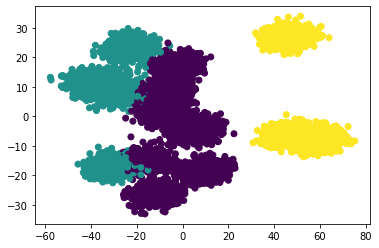

In [74]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

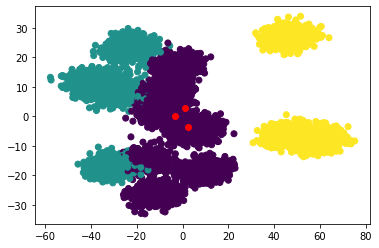

In [60]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

##### SSE (Sum of Squared Errors)
SSE คือ ความไม่ใกล้เคียงกับจุดศูนย์กลางมากน้อยเท่าไหน

In [61]:
kmeans.inertia_

10192922.646103252

In [62]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [63]:
SSE

[19492074.617149524,
 12287226.791411135,
 10192922.646103252,
 8882237.446246957,
 7776083.319813388,
 6741366.527387712,
 5648010.760576062,
 4633939.742169999]

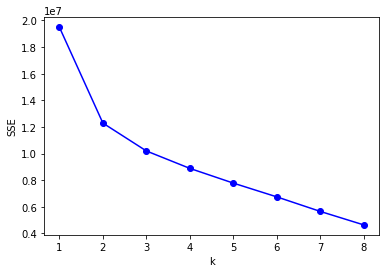

In [64]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') 
plt.xlabel('k')
plt.ylabel('SSE');

## Silhouette coefficient  คือ วิธีไว้ใช้หาจำนวน k ที่เหมาะสมที่สุด

In [65]:
from sklearn import metrics

In [66]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

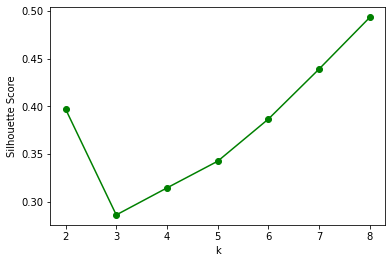

In [67]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') # ทำการ Silhouette ดีที่สุดที่ คือ 2
plt.xlabel('k')
plt.ylabel('Silhouette Score');

# 3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

In [68]:
from sklearn.manifold import MDS

In [69]:
mds = MDS(n_components=2)

In [70]:
new_mds = mds.fit_transform(new_data)

In [71]:
kmeans_2 = KMeans(n_clusters=3,random_state=2021)
kmeans_2.fit(new_data)
g = kmeans_2.predict(new_data)

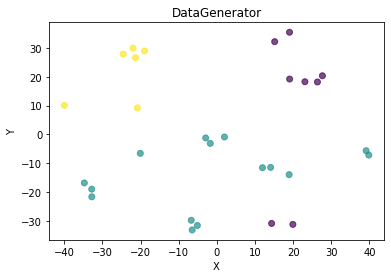

In [72]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');